In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
data = pd.read_excel('/content/drive/MyDrive/first live project/Consumer creditworthiness train data.xlsx')

In [135]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [136]:
data.shape

(521, 13)

In [137]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Loan_ID,521.0,547517.82,261344.26,101559.0,314492.0,543412.0,783776.0,998791.0
ApplicantIncome,521.0,1229406.48,1449755.23,33750.0,646875.0,858150.0,1292850.0,18225000.0
CoapplicantIncome,521.0,349599.44,482429.64,0.0,0.0,281250.0,517950.0,4500000.0
LoanAmount,521.0,279704.41,171250.51,0.0,196000.0,250000.0,320000.0,1400000.0
Loan_Amount_Term,507.0,343.27,63.61,12.0,360.0,360.0,360.0,480.0
Credit_History,478.0,0.85,0.36,0.0,1.0,1.0,1.0,1.0


In [138]:
data.isnull().sum()

Loan_ID               0
Gender               10
Married               3
Dependents           13
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
(data.isnull().sum() / len(data) * 100).round(2)

Loan_ID              0.00
Gender               1.92
Married              0.58
Dependents           2.50
Education            0.00
Self_Employed        5.18
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.69
Credit_History       8.25
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [140]:
data = data.dropna()

In [141]:
data.shape

(422, 13)

In [142]:
#removing if any value which are equal to or less than 0 for applicant income
data = data[data['ApplicantIncome'] > 0]

In [143]:
#No '0' or less than '0' value found
data.shape

(422, 13)

In [144]:
#removing if any value which are equal to or less than 0 for loan amount term
data = data[data['Loan_Amount_Term'] > 0]

In [145]:
#No '0' or less than '0' value found
data.shape

(422, 13)

In [146]:
#removing if any value which are equal to or less than 0 for LoanAmount
data = data[data['LoanAmount'] > 0]

In [147]:
#8 values found which are 0 or less than 0
data.shape

(408, 13)

In [148]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            408 non-null    int64  
 1   Gender             408 non-null    object 
 2   Married            408 non-null    object 
 3   Dependents         408 non-null    object 
 4   Education          408 non-null    object 
 5   Self_Employed      408 non-null    object 
 6   ApplicantIncome    408 non-null    int64  
 7   CoapplicantIncome  408 non-null    float64
 8   LoanAmount         408 non-null    int64  
 9   Loan_Amount_Term   408 non-null    float64
 10  Credit_History     408 non-null    float64
 11  Property_Area      408 non-null    object 
 12  Loan_Status        408 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 44.6+ KB


In [150]:
data['Credit_History'] = data['Credit_History'].round(0).astype('int')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            408 non-null    int64  
 1   Gender             408 non-null    object 
 2   Married            408 non-null    object 
 3   Dependents         408 non-null    object 
 4   Education          408 non-null    object 
 5   Self_Employed      408 non-null    object 
 6   ApplicantIncome    408 non-null    int64  
 7   CoapplicantIncome  408 non-null    float64
 8   LoanAmount         408 non-null    int64  
 9   Loan_Amount_Term   408 non-null    float64
 10  Credit_History     408 non-null    int64  
 11  Property_Area      408 non-null    object 
 12  Loan_Status        408 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 44.6+ KB


In [152]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1,Urban,Y


# Hypothesis on Gender



- Chi-squared : 1.2932431706645715
- p-value: 0.25545113478532505

**conclusion :
 p-value: 0.25545113478532505, since p value is greater than the significant value, we are failed to reject the null hypothesis**


<Axes: xlabel='Gender', ylabel='count'>

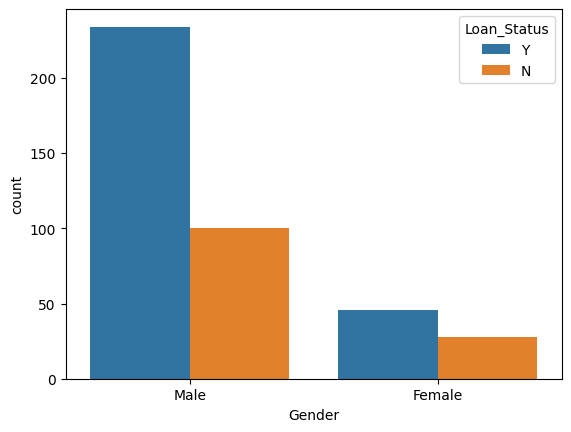

In [153]:
sns.countplot(x='Gender', hue='Loan_Status', data=data)

Chi Square test and P value and contingency table

In [159]:
contingency_table = pd.crosstab(data['Gender'], data['Loan_Status'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\n')
print('Contingency Table')
print(contingency_table)

Chi-squared statistic: 1.4073328728643093
p-value: 0.23549965656114194


Contingency Table
Loan_Status    N    Y
Gender               
Female        28   46
Male         100  234


# Hypothesis on Married

---



 - Chi-squared statistic: 4.007763470083406
 - p-value: 0.04529119283828445

---
Since the p value(0.45) is lesser than the significance (0.05) we are rejecting the null hypothesis, i.e we are rejecting there is no significance between the 2 variables and concluding there is a significance relation between the 2 variables

---



**Conclusion :  p-value: 0.04529119283828445, since p value is lesser than the significance(0.05) value, we can reject the null hypothesis**

<Axes: xlabel='Married', ylabel='count'>

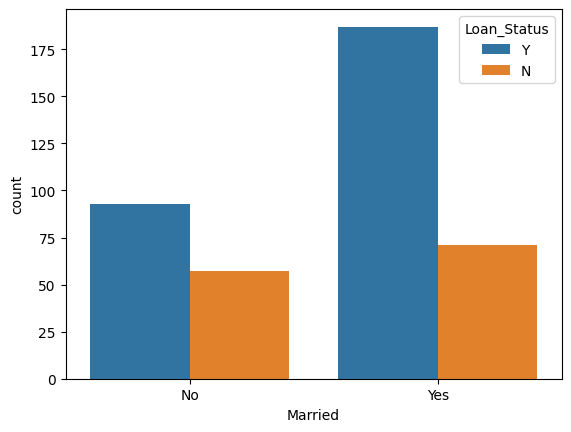

In [160]:
sns.countplot(x='Married', hue='Loan_Status', data=data)

In [161]:
# Assuming x and y are two categorical variables
contingency_table = pd.crosstab(data['Married'], data['Loan_Status'])

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\n contigency table\n')
print(contingency_table)

Chi-squared statistic: 4.364693521594681
p-value: 0.03669108269376473

 contigency table

Loan_Status   N    Y
Married             
No           57   93
Yes          71  187


# Hypothesis on Dependents

---
 - Chi-squared statistic: 5.91329099575655
 - p-value: 0.11590586274537017
---
p_value(0.115) is greater than its significance (0.05), so we are failed to reject the null hypothesis, means there is no significant eveidence to prove there is a relationship between the Loan_Status and Dependents


---


conclusion: **p-value: 0.11590586274537017, since p value is greater than the significance(0.05) value, we can failed to reject the null hypothesis**


<Axes: xlabel='Dependents', ylabel='count'>

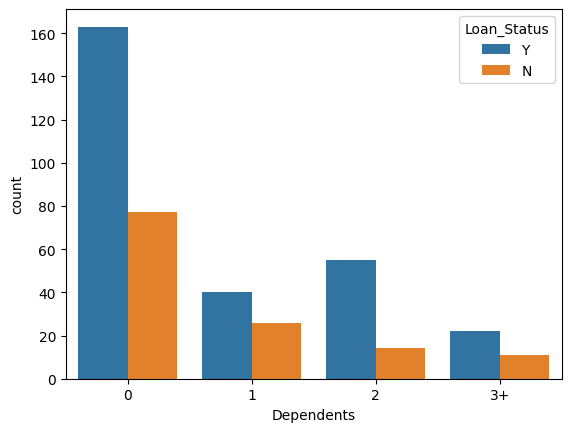

In [162]:
sns.countplot(x='Dependents', hue='Loan_Status', data=data)

In [163]:

contingency_table = pd.crosstab(data['Dependents'], data['Loan_Status'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 6.023983536843593
p-value: 0.11044918632357187

Contingency table

Loan_Status   N    Y
Dependents          
0            77  163
1            26   40
2            14   55
3+           11   22


# Hypothesis on Education

---
 - Chi-squared statistic: 2.9592449303803376
 - p-value: 0.08538780700705759


---
Since P-value(0.085) is greater than the significance (0.05) we are failed to reject the null hypothesis, means there is no significant evidence to prove there is a relationship between education and loan status

**conclusion : p-value: 0.08538780700705759, since p value is greater than the significance(0.05) value, we failed to reject the null hypothesis**


<Axes: xlabel='Education', ylabel='count'>

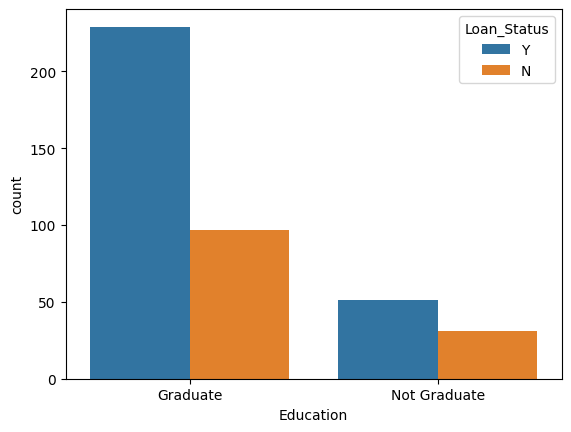

In [164]:
sns.countplot(x='Education', hue='Loan_Status', data=data)

In [165]:
contingency_table = pd.crosstab(data['Education'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 1.6159897982086746
p-value: 0.20365186083449704

Contingency table

Loan_Status    N    Y
Education            
Graduate      97  229
Not Graduate  31   51


# Hypothesis on Self Employed


---
- Chi-squared statistic: 0.07873988167202758
- p-value: 0.7790124024453439


---
Since p value(0.77) is greater than the significance (0.05) we are failed to reject the null hypothesis, meaning that there is no signifance to prove there is a relation between self employee and the loan status 

---



**conclusion : p-value: 0.08538780700705759, since p value is greater than the significance(0.05) value, we failed to reject the null hypothesis**


<Axes: xlabel='Self_Employed', ylabel='count'>

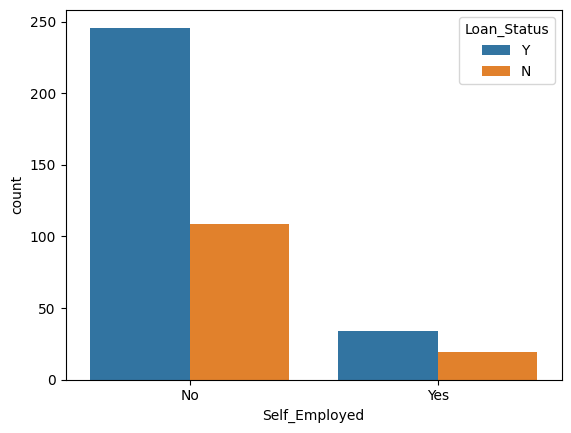

In [166]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=data)

In [167]:

contingency_table = pd.crosstab(data['Self_Employed'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 0.353162560267264
p-value: 0.5523283179737746

Contingency table

Loan_Status      N    Y
Self_Employed          
No             109  246
Yes             19   34


# Hypothesis on Property Area

---
 - Chi-squared statistic: 16.96198274694848
 - p-value: 0.00020737301667071782


---
since the p-value(0.000207) is lower then the significance value(0.05) we can reject the null hypotheis and conclude there is a significance relation between the 2 property area and the loan status


---


**conclusion : p-value: 0.00020737301667071782, since p value is lesser than the significance(0.05) value, we can reject the null hypothesis**


<Axes: xlabel='Property_Area', ylabel='count'>

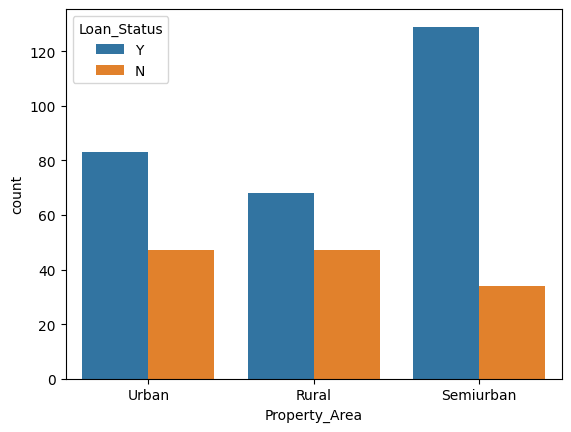

In [168]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)

In [169]:

contingency_table = pd.crosstab(data['Property_Area'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 14.566367012888424
p-value: 0.0006869950256555372

Contingency table

Loan_Status     N    Y
Property_Area         
Rural          47   68
Semiurban      34  129
Urban          47   83


# Hypothesis on Loan_Amount_Term 




---
- Chi-squared statistic: 13.897465145546272
- p-value: 0.08447740727274937

---
since the p-value (0.084) is greater than the significance(0.05), we failed to reject the null hypothesis, means there is no significant proof to show relation ship between the loan amount term and the loan status 

---


**conclusion : p-value: 0.08447740727274937, since p value is greater than the significance(0.05) value, we failed to reject the null hypothesis**





<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

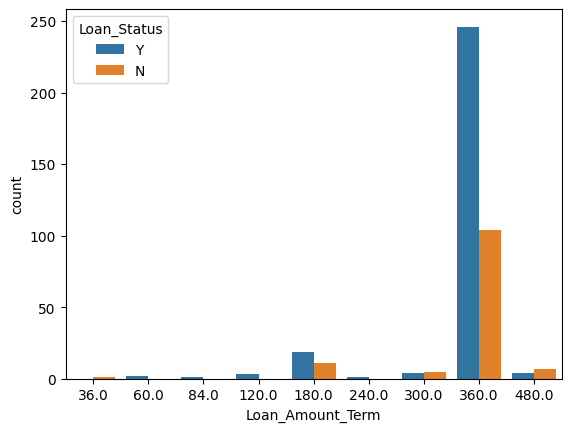

In [170]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=data)


In [171]:

contingency_table = pd.crosstab(data['Loan_Amount_Term'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 13.98804313543599
p-value: 0.08207760028135819

Contingency table

Loan_Status         N    Y
Loan_Amount_Term          
36.0                1    0
60.0                0    2
84.0                0    1
120.0               0    3
180.0              11   19
240.0               0    1
300.0               5    4
360.0             104  246
480.0               7    4


# Hypothesis on Credit History
---
 - Chi-squared statistic: 107.81217854736195
 - p-value: 2.954950319647669e-25


---

Since the P value(2.954950319647669e-25) is lower than the significant value(0.05) we can reject the null hypotheis, there is a strong relationship between the credit history and the loan status



---


**conclusion : p-value: 2.954950319647669e-25, since p value is lower than the significance(0.05) value, we can reject the null hypothesis**


<Axes: xlabel='Credit_History', ylabel='count'>

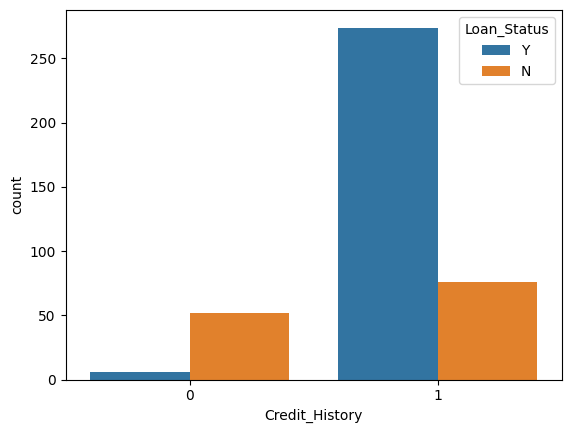

In [172]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)

In [173]:
from scipy.stats import chi2_contingency

# Create a contingency table of Dependents and Loan_Status
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

Chi-squared statistic: 103.53977111189303
p-value: 2.5521907079942325e-24

Contingency table

Loan_Status      N    Y
Credit_History         
0               52    6
1               76  274


#Hypothesis on ApplicatIncome 

---
 - Chi-squared statistic: 3.3839342932255203
 - p-value: 0.6410179106404577



---

Since the p-value(0.641) is greater than the significanve value (0.05), we failed to reject the null hypothesis, mean thet there is no enough eveidence to prove there is a relation between 
**Conclusion : people having an high income is at low credit risk**

In [174]:
#converting the continious variabel to categorical variable by binning  the frequencies of value
data['ApplicantIncome_group'] = pd.cut(data['ApplicantIncome'], bins=[0, 100000, 500000, 1000000, 2000000, 3000000, 4500000], labels=['< 100K', '100K-500K', '500K-1M', '1M-2M', '2M-3M', '> 3M'])
ApplicantIncome_group_loan_status = data.groupby(['ApplicantIncome_group','Loan_Status'])['ApplicantIncome_group'].count()
print(ApplicantIncome_group_loan_status)

ApplicantIncome_group  Loan_Status
< 100K                 N                1
                       Y                0
100K-500K              N               13
                       Y               29
500K-1M                N               61
                       Y              145
1M-2M                  N               34
                       Y               77
2M-3M                  N               11
                       Y               17
> 3M                   N                5
                       Y                9
Name: ApplicantIncome_group, dtype: int64


<Axes: xlabel='ApplicantIncome_group', ylabel='count'>

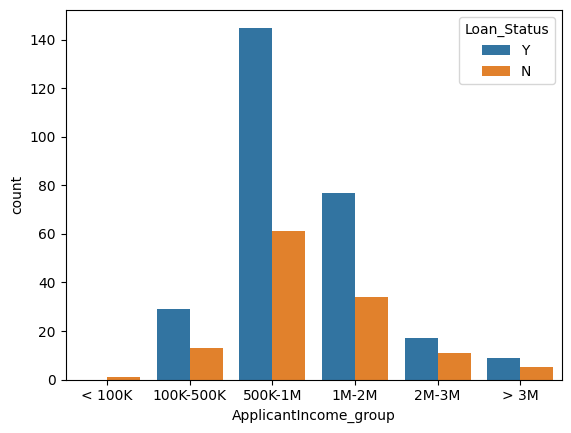

In [175]:
sns.countplot(x='ApplicantIncome_group', hue='Loan_Status', data=data)

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table of Dependents and Loan_Status
contingency_table = pd.crosstab(data['ApplicantIncome_group'], data['Loan_Status'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print('\nContingency table\n')
print(contingency_table)

In [177]:
data['Loan_Status'] = data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

In [178]:
data['Loan_Status'].value_counts()

1    280
0    128
Name: Loan_Status, dtype: int64

**Creating a New column Total income  = applicant income + co applicant income**

created a new column Total_Income by adding the applicant income and the co applicant income, because if applicant didn't pay the loan, co-applicant is responsible to pay the loan, so combined the both applicant and co applicant income

In [179]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [180]:
# data is right skewed, we will try to normlaize the data by applying log transformation, log transformation is apply for the right skewed data to make data normalize

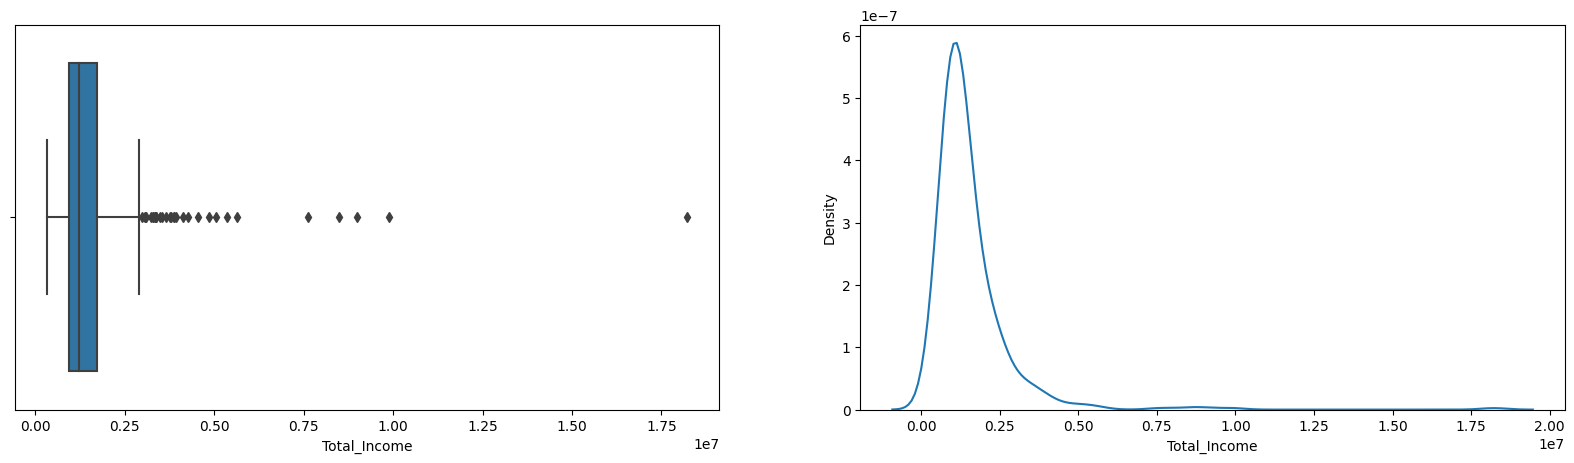

In [181]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['Total_Income'], ax = ax[0])
sns.kdeplot(data = data, x = data['Total_Income'], ax = ax[1])
plt.show()

In [182]:
import scipy.stats as stats


# Perform ANOVA test
statistic, p_value = stats.f_oneway(data['Total_Income'], data['Loan_Status'])

# Print ANOVA results
print("One-way ANOVA Results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

# Interpret ANOVA results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in the mean scores among the groups.")
else:
    print("There is no statistically significant difference in the mean scores among the groups.")

One-way ANOVA Results:
F-statistic: 525.6131010826534
p-value: 3.9115899253774545e-90
There is a statistically significant difference in the mean scores among the groups.


Log Transformation for the Total_Income 
- Doing the log transformation 
  - make the data distribution more symmetric by compressing the tails of the data. 
  - This can help reduce the impact of outliers and make the data distribution more symmetric. 
  - Log transformation can also help in reducing the influence of extreme values on summary statistics such as mean and standard deviation, which are sensitive to outliers.

In [183]:
data['Totalincome_log'] = np.log(data['Total_Income'])

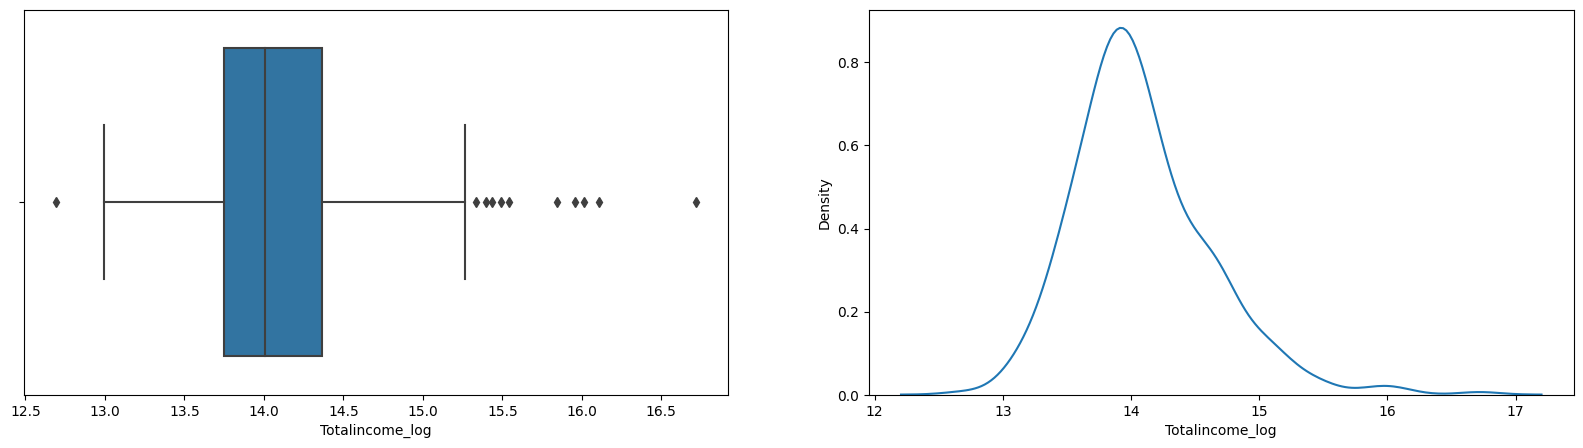

In [184]:
# now again check with the box and kde plot for data normalization
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['Totalincome_log'], ax = ax[0])
sns.kdeplot(data = data, x = data['Totalincome_log'], ax = ax[1])
plt.show()


#data is some what near to the normalize
#data normalize gives the better performance in the model

In [185]:
data.shape

(408, 16)

In [186]:
from scipy.stats import zscore 
outliers = abs(zscore(data['Totalincome_log']) > 3)
outliers.sum()

5

In [187]:
data = data[~outliers]

In [188]:
data.shape

(403, 16)

In [189]:
data['total_income_log_group'] = pd.cut(data['Totalincome_log'], bins=3, labels=['ti_low', 'ti_medium', 'ti_high'])
total_income_status_group = data.groupby(['total_income_log_group','Loan_Status'])['total_income_log_group'].count()
print(total_income_status_group)

total_income_log_group  Loan_Status
ti_low                  0               27
                        1               47
ti_medium               0               74
                        1              193
ti_high                 0               25
                        1               37
Name: total_income_log_group, dtype: int64


**Creating a New column income to debt ratio  = total income / LoanAmount**

created a new column income_debt_ratio by dividing the total income and the loan amount,itt will gives the consumers worthness to repay the loan. 

In [190]:
data['income_debt_ratio']  = (data['Total_Income'] / data['LoanAmount']).round(3)

In [191]:
data['income_debt_ratio'].head()

0    5.264
1    5.353
2    5.114
3    4.632
4    4.787
Name: income_debt_ratio, dtype: float64

In [192]:
data['income_debt_ratio'].min(), data['income_debt_ratio'].max()

(1.36, 37.299)

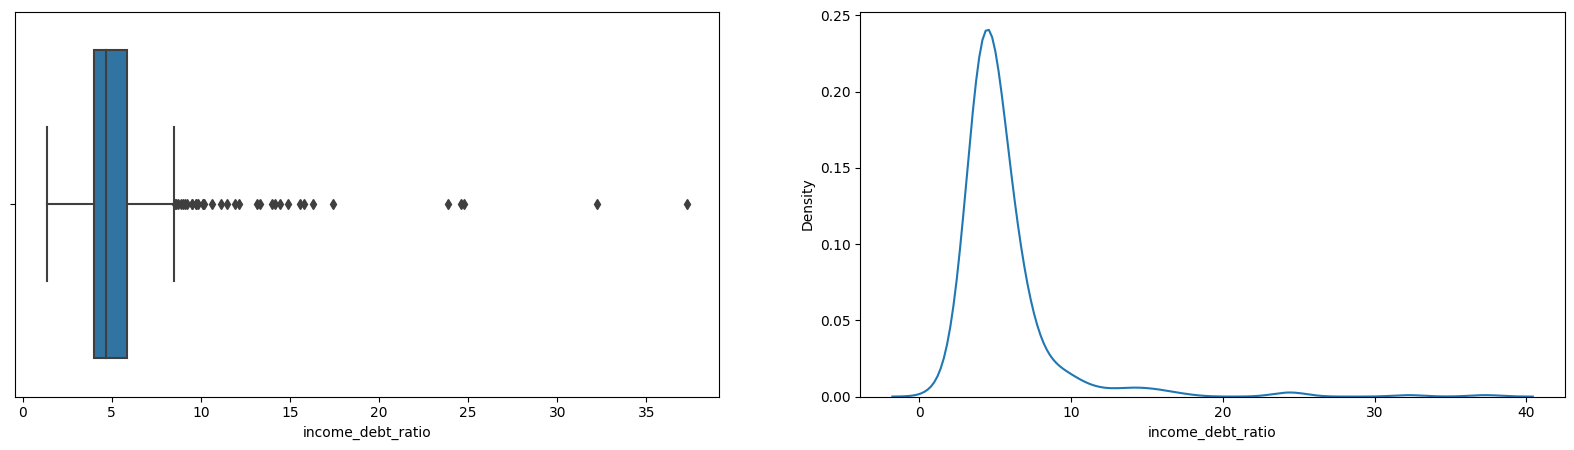

In [193]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['income_debt_ratio'], ax = ax[0])
sns.kdeplot(data = data, x = data['income_debt_ratio'], ax = ax[1])
plt.show()


since p value is 4.966196396850589e-101 There is a statistically significant difference in the mean scores among the groups



In [194]:
import scipy.stats as stats


# Perform ANOVA test
statistic, p_value = stats.f_oneway(data['income_debt_ratio'], data['Loan_Status'])

# Print ANOVA results
print("One-way ANOVA Results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

# Interpret ANOVA results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in the mean scores among the groups.")
else:
    print("There is no statistically significant difference in the mean scores among the groups.")

One-way ANOVA Results:
F-statistic: 793.6571031649802
p-value: 5.16526707444589e-122
There is a statistically significant difference in the mean scores among the groups.


Log Transformation for the income_debt_ratio 
- Doing the log transformation 
  - make the data distribution more symmetric by compressing the tails of the data. 
  - This can help reduce the impact of outliers and make the data distribution more symmetric. 
  - Log transformation can also help in reducing the influence of extreme values on summary statistics such as mean and standard deviation, which are sensitive to outliers.

In [195]:
data['income_debt_ratio_log'] = np.log(data['income_debt_ratio'])

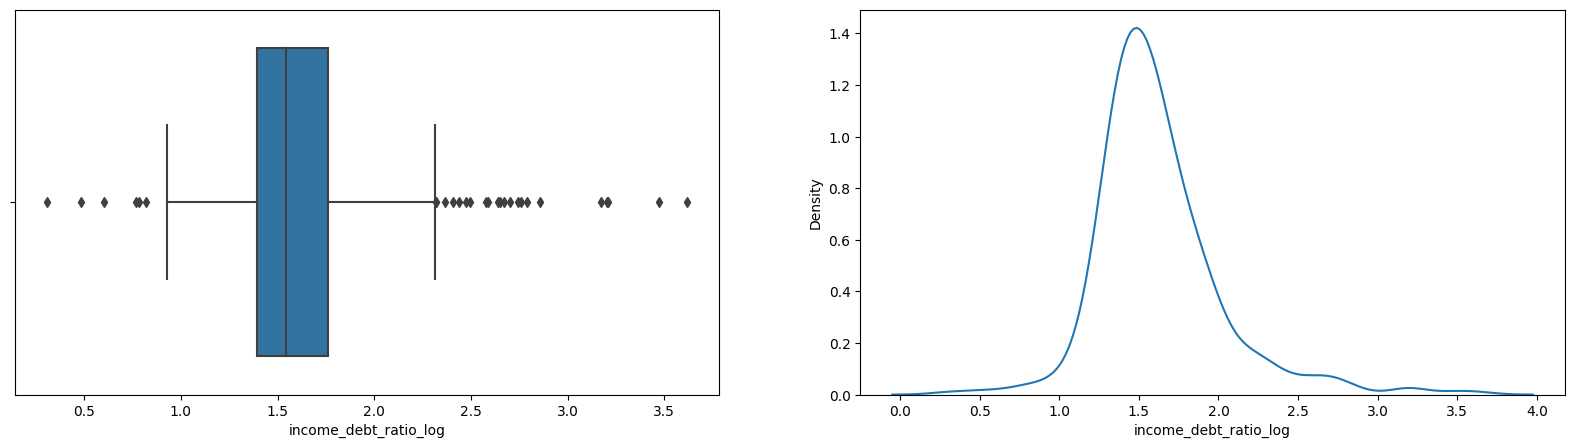

In [196]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['income_debt_ratio_log'], ax = ax[0])
sns.kdeplot(data = data, x = data['income_debt_ratio_log'], ax = ax[1])
plt.show()

In [197]:
outliers = abs(zscore(data['income_debt_ratio_log']) > 3)
outliers.sum()

6

In [198]:
data = data[~outliers]

In [199]:
data.shape

(397, 19)

In [200]:
data['income_debt_ratio_log_group'] = pd.cut(data['income_debt_ratio_log'], bins=3, labels=['idr_low', 'idr_medium', 'idr_high'])
income_debt_ratio_group = data.groupby(['income_debt_ratio_log','Loan_Status'])['income_debt_ratio_log'].count()
print(income_debt_ratio_group)

income_debt_ratio_log  Loan_Status
0.307485               1              1
0.485508               0              1
0.603222               0              1
0.765933               0              1
0.786182               0              1
                                     ..
2.670210               1              1
2.702032               0              1
2.745089               1              1
2.758933               1              1
2.790551               1              1
Name: income_debt_ratio_log, Length: 382, dtype: int64


Loan Amount

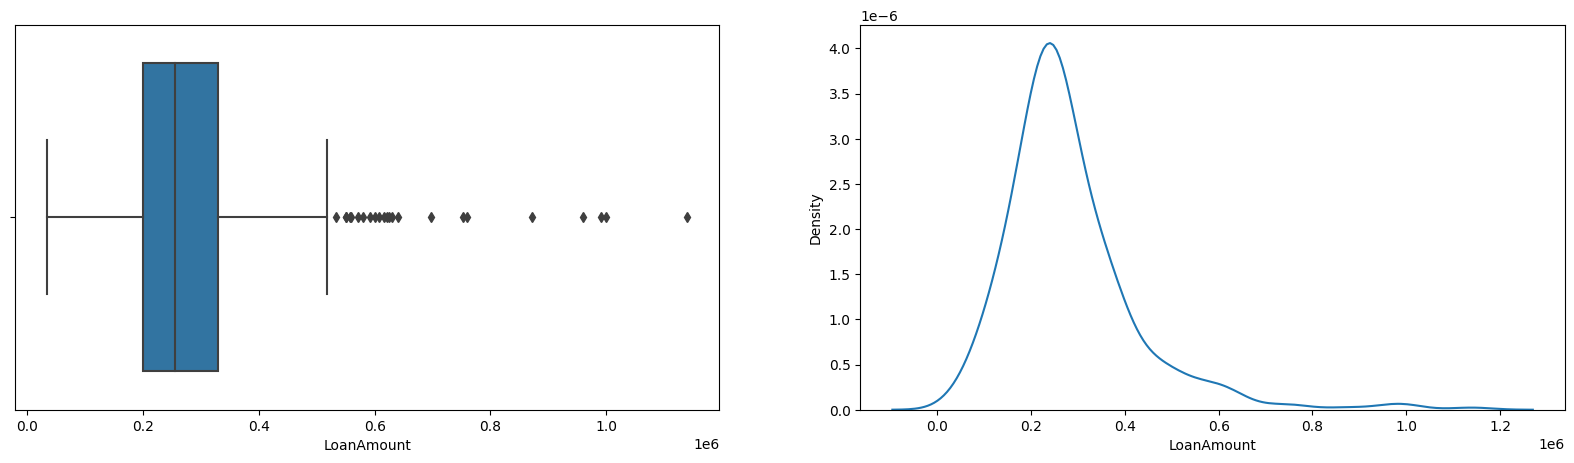

In [201]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['LoanAmount'], ax = ax[0])
sns.kdeplot(data = data, x = data['LoanAmount'], ax = ax[1])
plt.show()

In [202]:
import scipy.stats as stats


# Perform ANOVA test
statistic, p_value = stats.f_oneway(data['LoanAmount'], data['Loan_Status'])

# Print ANOVA results
print("One-way ANOVA Results:")
print("F-statistic:", statistic)
print("p-value:", p_value)

# Interpret ANOVA results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in the mean scores among the groups.")
else:
    print("There is no statistically significant difference in the mean scores among the groups.")

One-way ANOVA Results:
F-statistic: 1547.600759265091
p-value: 1.8069236181759578e-188
There is a statistically significant difference in the mean scores among the groups.


Log Transformation for the loan amount 
- Doing the log transformation 
  - make the data distribution more symmetric by compressing the tails of the data. 
  - This can help reduce the impact of outliers and make the data distribution more symmetric. 
  - Log transformation can also help in reducing the influence of extreme values on summary statistics such as mean and standard deviation, which are sensitive to outliers.

In [203]:
data['Loanamount_log'] = np.log(data['LoanAmount'])

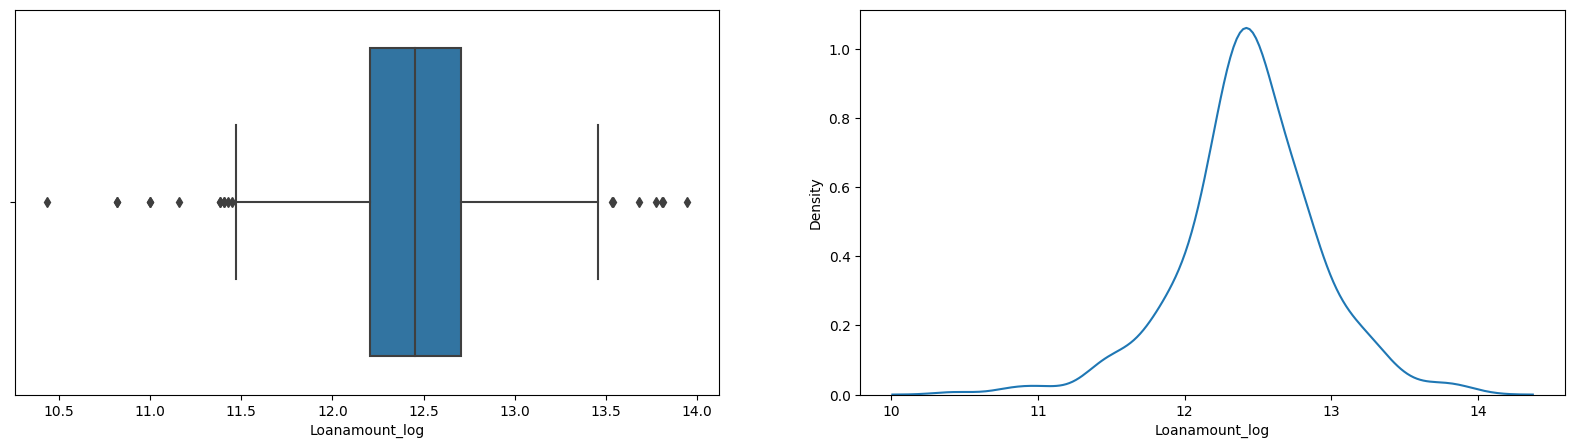

In [204]:
# now again check with the box and kde plot for data normalization
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(data = data, x = data['Loanamount_log'], ax = ax[0])
sns.kdeplot(data = data, x = data['Loanamount_log'], ax = ax[1])
plt.show()


#data is some what near to the normalize
#data normalize gives the better performance in the model

In [205]:
outliers = abs(zscore(data['Loanamount_log']) > 3)
outliers.sum()

1

In [206]:
data = data[~outliers]

In [207]:
data.shape

(396, 21)

In [208]:
data['loan_amount_log_group'] = pd.cut(data['Loanamount_log'], bins=3, labels=['la_low', 'la_medium', 'la_high'])
Loanamount_log_ratio_group = data.groupby(['Loanamount_log','Loan_Status'])['Loanamount_log'].count()
print(Loanamount_log_ratio_group)

Loanamount_log  Loan_Status
10.434116       1              1
10.819778       1              2
11.002100       1              2
11.156251       0              1
11.385092       1              2
                              ..
13.541074       1              1
13.678545       1              1
13.774689       0              1
13.805460       0              1
13.815511       0              1
Name: Loanamount_log, Length: 221, dtype: int64


In [209]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,ApplicantIncome_group,Total_Income,Totalincome_log,total_income_log_group,income_debt_ratio,income_debt_ratio_log,income_debt_ratio_log_group,Loanamount_log,loan_amount_log_group
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,...,1,1M-2M,1316025.0,14.090126,ti_medium,5.264,1.660891,idr_medium,12.429216,la_medium
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,...,0,1M-2M,1370475.0,14.130668,ti_medium,5.353,1.677657,idr_medium,12.452933,la_medium
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,...,1,500K-1M,675000.0,13.422468,ti_low,5.114,1.631982,idr_medium,11.790557,la_medium
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,...,1,500K-1M,1111725.0,13.921423,ti_medium,4.632,1.532989,idr_medium,12.388394,la_medium
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,...,1,1M-2M,1350000.0,14.115615,ti_medium,4.787,1.565904,idr_medium,12.549662,la_medium


In [210]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Status,ApplicantIncome_group,Total_Income,Totalincome_log,total_income_log_group,income_debt_ratio,income_debt_ratio_log,income_debt_ratio_log_group,Loanamount_log,loan_amount_log_group
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,...,1,1M-2M,1316025.0,14.090126,ti_medium,5.264,1.660891,idr_medium,12.429216,la_medium
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,...,0,1M-2M,1370475.0,14.130668,ti_medium,5.353,1.677657,idr_medium,12.452933,la_medium
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,...,1,500K-1M,675000.0,13.422468,ti_low,5.114,1.631982,idr_medium,11.790557,la_medium
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,...,1,500K-1M,1111725.0,13.921423,ti_medium,4.632,1.532989,idr_medium,12.388394,la_medium
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,...,1,1M-2M,1350000.0,14.115615,ti_medium,4.787,1.565904,idr_medium,12.549662,la_medium


From the milestone 2, we got the features which are having p value less than 0.05

- Marriage
- property area
- credit history 
- Loan Amount

Now created the 2 new features 
- income_debt_ratio 
- total income
both are having pvalue less than 0.05 


And The Target Variable we need 
 - Loan_Status

In [211]:
# removing the unwanted variables

In [212]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_group', 'Total_Income', 'Totalincome_log',
       'total_income_log_group', 'income_debt_ratio', 'income_debt_ratio_log',
       'income_debt_ratio_log_group', 'Loanamount_log',
       'loan_amount_log_group'],
      dtype='object')

In [216]:
data_new = data[['Married','Property_Area','Credit_History','loan_amount_log_group','total_income_log_group','income_debt_ratio_log_group','Loan_Status']]

In [214]:
data_new.head()

,Married,Property_Area,Credit_History,loan_amount_log_group,total_income_log_group,income_debt_ratio_log_group,Loan_Status
0,No,Urban,1,la_medium,ti_medium,idr_medium,1
1,Yes,Rural,1,la_medium,ti_medium,idr_medium,0
2,Yes,Urban,1,la_medium,ti_low,idr_medium,1
3,Yes,Urban,1,la_medium,ti_medium,idr_medium,1
4,No,Urban,1,la_medium,ti_medium,idr_medium,1


In [215]:
data_new.shape

(396, 7)

In [217]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 520
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Married                      396 non-null    object  
 1   Property_Area                396 non-null    object  
 2   Credit_History               396 non-null    int64   
 3   loan_amount_log_group        396 non-null    category
 4   total_income_log_group       396 non-null    category
 5   income_debt_ratio_log_group  396 non-null    category
 6   Loan_Status                  396 non-null    int64   
dtypes: category(3), int64(2), object(2)
memory usage: 17.0+ KB


In [218]:
data_new['loan_amount_log_group'] = data_new['loan_amount_log_group'].astype('object')

<ipython-input-218-4f9f34db08de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['loan_amount_log_group'] = data_new['loan_amount_log_group'].astype('object')


In [219]:
data_new['total_income_log_group'] = data_new['total_income_log_group'].astype('object')

<ipython-input-219-6d19818fdd70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['total_income_log_group'] = data_new['total_income_log_group'].astype('object')


In [220]:
data_new['income_debt_ratio_log_group'] = data_new['income_debt_ratio_log_group'].astype('object')

<ipython-input-220-0d2527128137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['income_debt_ratio_log_group'] = data_new['income_debt_ratio_log_group'].astype('object')


In [221]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 520
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Married                      396 non-null    object
 1   Property_Area                396 non-null    object
 2   Credit_History               396 non-null    int64 
 3   loan_amount_log_group        396 non-null    object
 4   total_income_log_group       396 non-null    object
 5   income_debt_ratio_log_group  396 non-null    object
 6   Loan_Status                  396 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 24.8+ KB


In [222]:
data_obj = data_new.select_dtypes(include = 'object')
data_new_int_obj = pd.get_dummies(data = data_obj, columns = data_obj.columns)

In [223]:
data_new_int = data_new.select_dtypes(exclude = 'object')
data_new_final = data_new_int_obj.join(data_new_int)

In [224]:
data_new_final.head()

,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,loan_amount_log_group_la_high,loan_amount_log_group_la_low,loan_amount_log_group_la_medium,total_income_log_group_ti_high,total_income_log_group_ti_low,total_income_log_group_ti_medium,income_debt_ratio_log_group_idr_high,income_debt_ratio_log_group_idr_low,income_debt_ratio_log_group_idr_medium,Credit_History,Loan_Status
0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1
1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0
2,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,1
3,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1
4,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1


In [225]:
x = data_new_final.drop('Loan_Status', axis=1)
y = data_new_final['Loan_Status']

In [226]:
data_new_final['Loan_Status'].value_counts()

1    271
0    125
Name: Loan_Status, dtype: int64

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

precision : it is the ratio of true positive(TP) predictiones from all the positive predictiones(TP+FP), 
precision = TP / (TP + FP) 
precision gives model's ability to correctly identify positive instance. :


recall(True Positive Rate / Sensitivity) : it is caluclated as the ratio of true positive predictiones to the sum of true positive and false negative, recall = TP / (TP + FN)

It gives the model's ability to identify all positive instance

F1 Score : it is the harmonic mean of the precision and recall, It is a single value which balances both precision and recall
F1 Score = 2 * (Precision * Recall) / (Precision + Recall) 

Accuracy : Accuracy is the Ratio of the True Positive + True Negative to the Total number of predictiones 

Accuracy = (TP+TN) / (TP+TN+FP+FN) 


AUC - Roc : AUC ROC cureve is the graph between true positive rate and false Positive rate, it shows the model's ability to correctly classify positive and negative instances based on the prediction probablities generated by the model* 

---
***Objective of the model is to reduce giving loans to the bad customers. means we have to reduce the false positive, since false positive is inversly proportional to the precision, we are taking precision as the model evaluation metric.***


From the below models highest precsion is adaboost 
  - Accuracy_Score :  0.875
  - precision_score :  0.9838709677419355
  - roc_auc : 0.84

---





Score Metrics By different Algorithms 
- Logistic Regression
  - F1_Score :  0.7999999999999999
  - Accuracy_Score :  0.725
  - precision_score :  0.7096774193548387
  - recall_score :  0.9166666666666666
  - roc_auc : 0.84
- KNN
  - F1_Score :  0.7115384615384616
  - Accuracy_Score :  0.625
  - precision_score :  0.5967741935483871
  - recall_score :  0.8809523809523809
  - roc-auc : 0.72
- Decision Tree classifier
  - F1_Score :  0.8959999999999999
  - Accuracy_Score :  0.8375
  - precision_score :  0.9032258064516129
  - recall_score :  0.8888888888888888
  - roc-auc : 0.85
- SVM
  - F1_Score :  0.9076923076923077
  - Accuracy_Score :  0.85
  - precision_score :  0.9516129032258065
  - recall_score :  0.8676470588235294
  - roc-auc : 0.79
- Naive Bayes
  - F1_Score :  0.864
  - Accuracy_Score :  0.7875
  - precision_score :  0.8709677419354839
  - recall_score :  0.8571428571428571
  - roc-auc : 0.77
- Gradient Boosting
  - F1_Score :  0.8959999999999999
  - Accuracy_Score :  0.8375
  - precision_score :  0.9032258064516129
  - recall_score :  0.8888888888888888
  - roc-auc : 0.83
- Random Forest Classifier
  - F1_Score :  0.923076923076923
  - Accuracy_Score :  0.875
  - precision_score :  0.967741935483871
  - recall_score :  0.8823529411764706
  - roc-auc : 0.85
- Adaboost Classifier
  - F1_Score :  0.9242424242424242
  - Accuracy_Score :  0.875
  - precision_score :  0.9838709677419355
  - recall_score :  0.8714285714285714
  - roc_auc : 0.84



## LOGISTIC REGRESSION

In [228]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', C = 0.01, max_iter = 100 )
lr.fit(x_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced')

In [229]:
y_pred_cm = lr.predict(x_test)

In [230]:
y_pred = lr.predict_proba(x_test)

[[14  4]
 [18 44]]
F1_Score :  0.7999999999999999
Accuracy_Score :  0.725
precision_score :  0.7096774193548387
recall_score :  0.9166666666666666


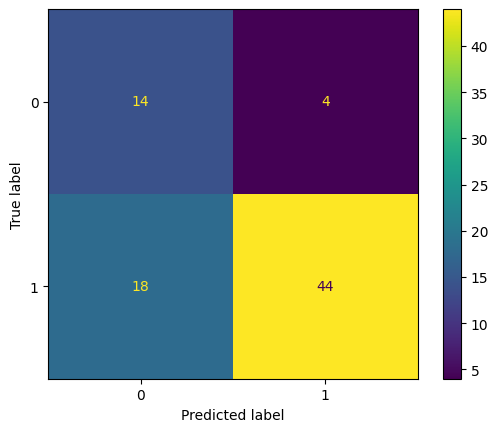

In [231]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred_cm)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred_cm, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred_cm, y_test))
print('precision_score : ',precision_score(y_pred_cm, y_test))
print('recall_score : ',recall_score(y_pred_cm, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=lr.classes_)
disp.plot()

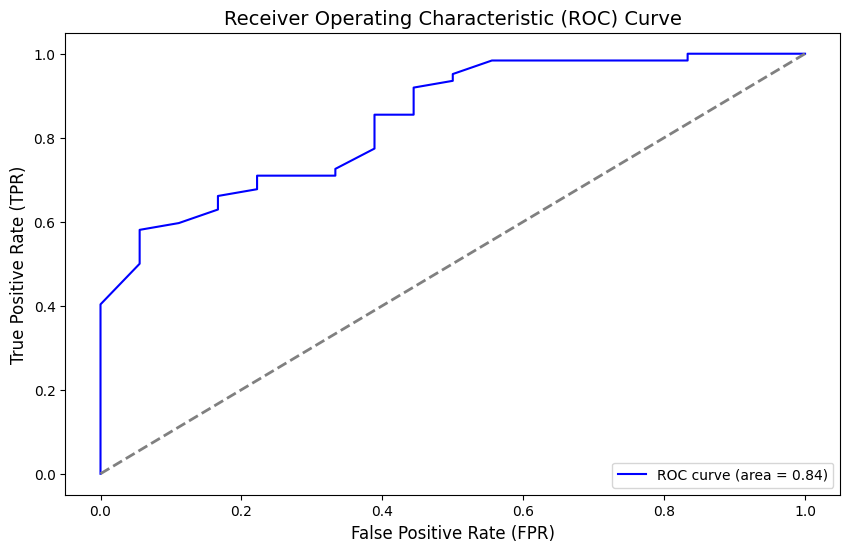

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## KNN

In [233]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2,  p = 1, weights = 'distance')
neigh.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=2, p=1, weights='distance')

In [234]:
y_pred = neigh.predict(x_test)

In [235]:
y_pred_auc = neigh.predict_proba(x_test)

[[13  5]
 [25 37]]
F1_Score :  0.7115384615384616
Accuracy_Score :  0.625
precision_score :  0.5967741935483871
recall_score :  0.8809523809523809


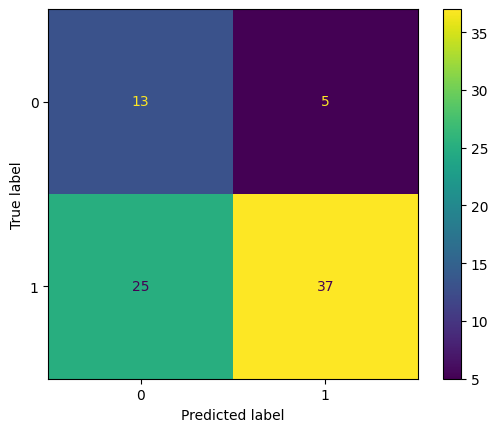

In [236]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=neigh.classes_)
disp.plot()

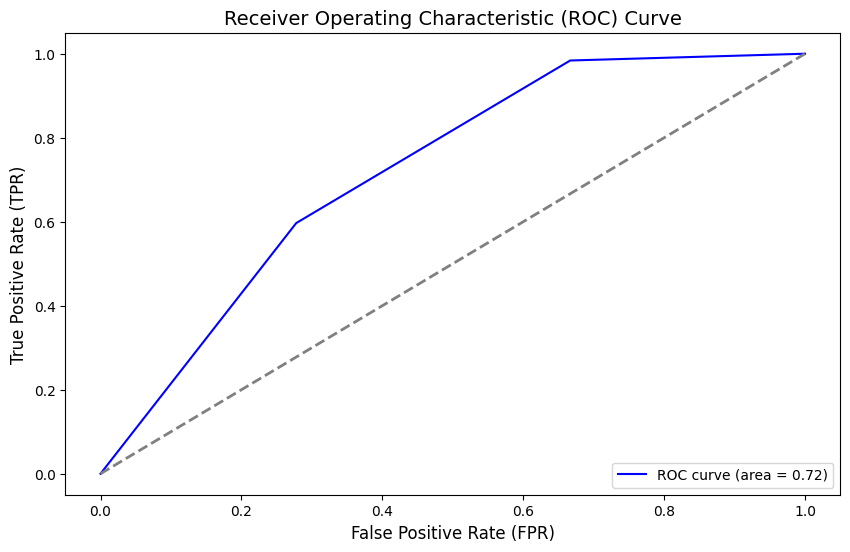

In [237]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## DECISIONTREE CLASSIFIER

In [238]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0,criterion = 'gini', max_depth = 5, min_samples_leaf = 1, splitter = 'best', min_samples_split = 4 )
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=0)

In [239]:
y_pred_auc = dtc.predict_proba(x_test)

In [240]:
y_pred = dtc.predict(x_test)

[[10  8]
 [ 3 59]]
F1_Score :  0.9147286821705426
Accuracy_Score :  0.8625
precision_score :  0.9516129032258065
recall_score :  0.8805970149253731


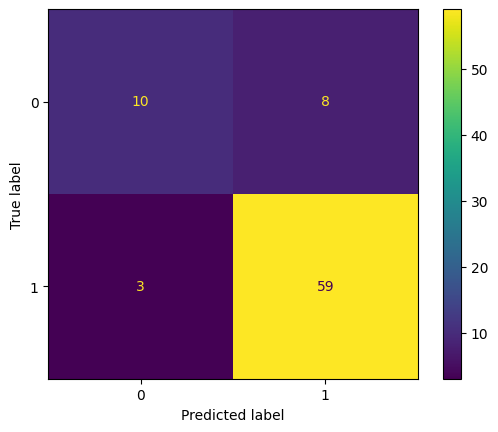

In [241]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=dtc.classes_)
disp.plot()

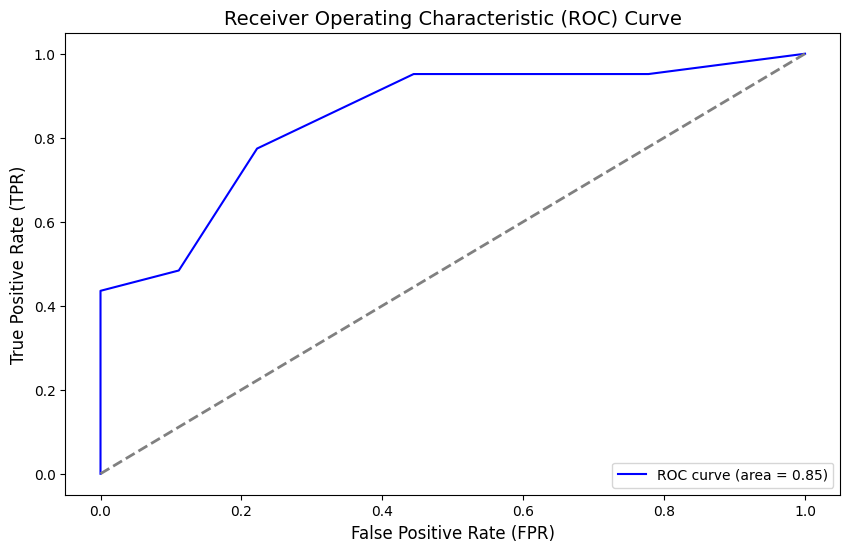

In [243]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## SVM

In [247]:
from sklearn.svm import SVC
vectormachine = SVC(C = 0.1, decision_function_shape='ovo', kernel = 'linear',max_iter = 20, probability=True)
vectormachine.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=0.1, decision_function_shape='ovo', kernel='linear', max_iter=20,
    probability=True)

In [248]:
y_pred = vectormachine.predict(x_test)

In [249]:
y_pred_auc = vectormachine.predict_proba(x_test)

[[ 9  9]
 [11 51]]
F1_Score :  0.8360655737704918
Accuracy_Score :  0.75
precision_score :  0.8225806451612904
recall_score :  0.85


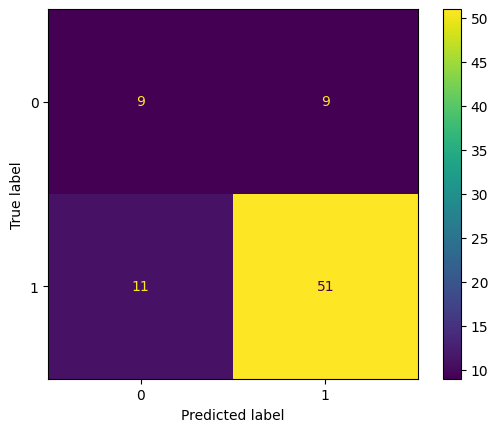

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=vectormachine.classes_)
disp.plot()

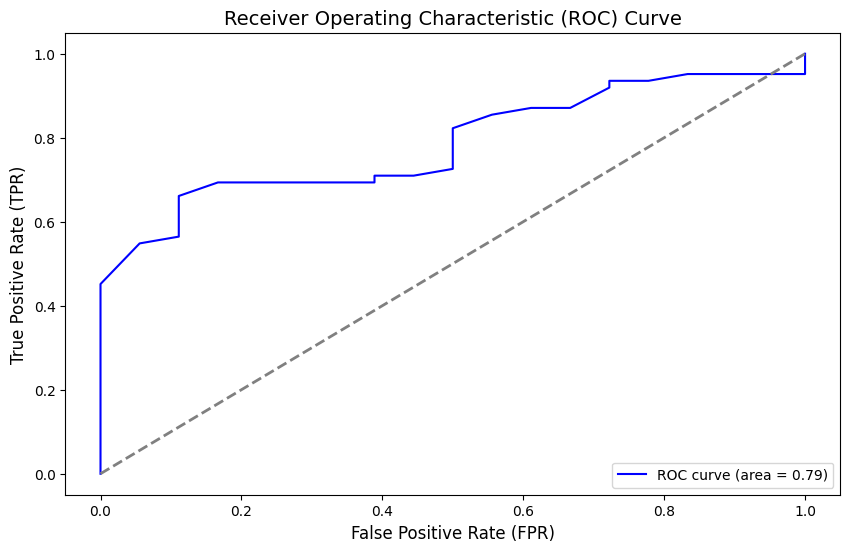

In [251]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## NAIVE BAYES

In [252]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

In [253]:
y_pred_auc = gnb.predict_proba(x_test)

[[ 9  9]
 [ 8 54]]
F1_Score :  0.864
Accuracy_Score :  0.7875
precision_score :  0.8709677419354839
recall_score :  0.8571428571428571


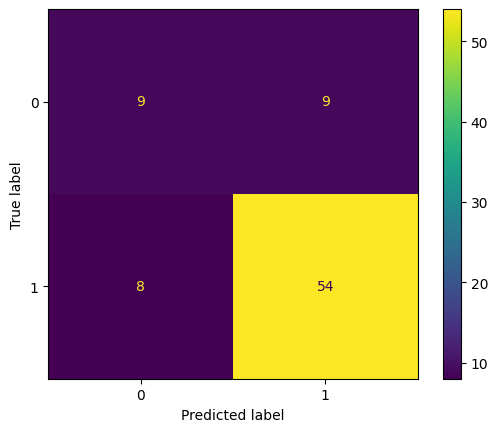

In [254]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=vectormachine.classes_)
disp.plot()

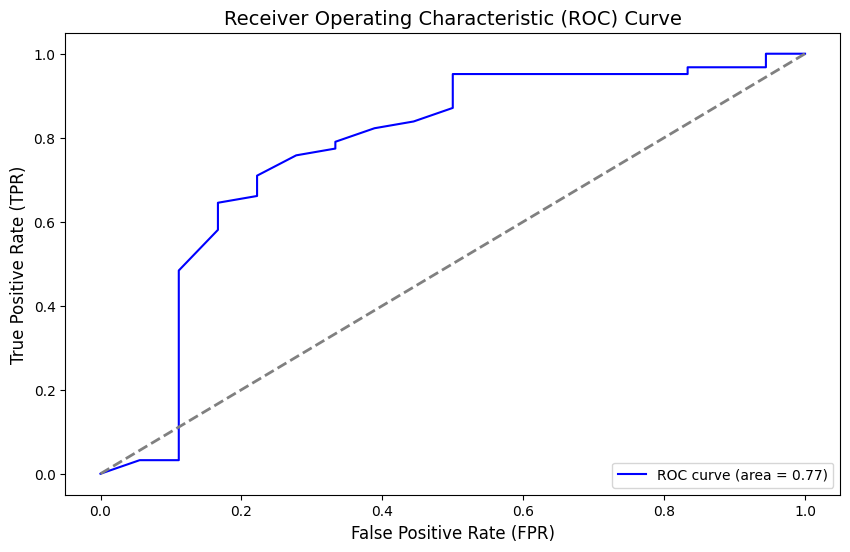

In [255]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## GRADIENT BOOSTING

In [256]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate =  0.01,loss = 'log_loss', max_depth =  3, max_features =  None, min_samples_leaf =  4, min_samples_split =  10, n_estimators = 50, subsample = 0.9)
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=50,
                           subsample=0.9)

In [257]:
y_pred_auc = gb.predict_proba(x_test)

In [258]:
y_pred = vectormachine.predict(x_test)

[[ 9  9]
 [11 51]]
F1_Score :  0.8360655737704918
Accuracy_Score :  0.75
precision_score :  0.8225806451612904
recall_score :  0.85


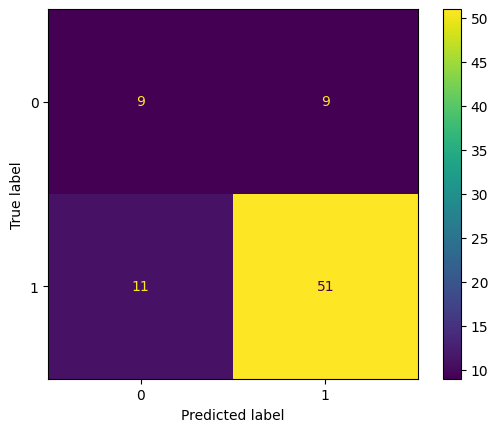

In [259]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=gb.classes_)
disp.plot()

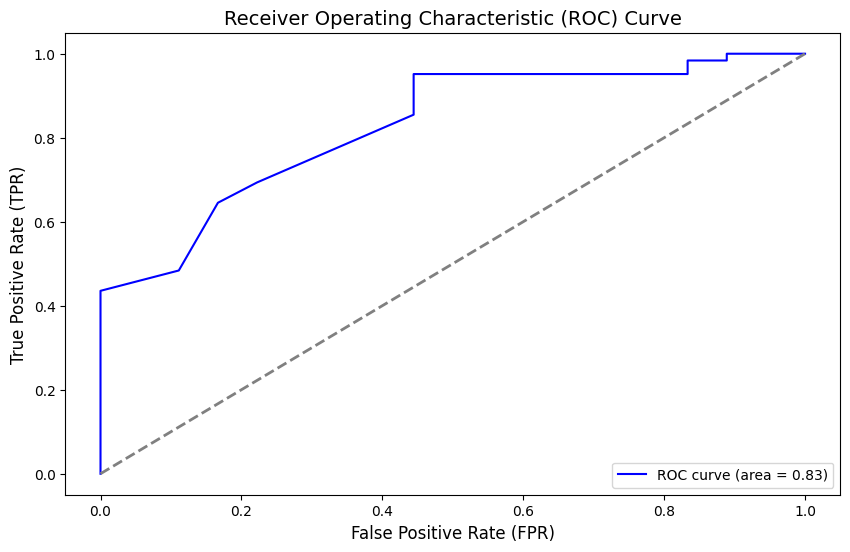

In [260]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## RANDOM FOREST CLASSIFIER

In [261]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth =  10, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split= 8, n_estimators =  50)
randomforest = rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [262]:
y_pred_auc = rfc.predict_proba(x_test)

[[ 9  9]
 [ 2 60]]
F1_Score :  0.9160305343511451
Accuracy_Score :  0.8625
precision_score :  0.967741935483871
recall_score :  0.8695652173913043


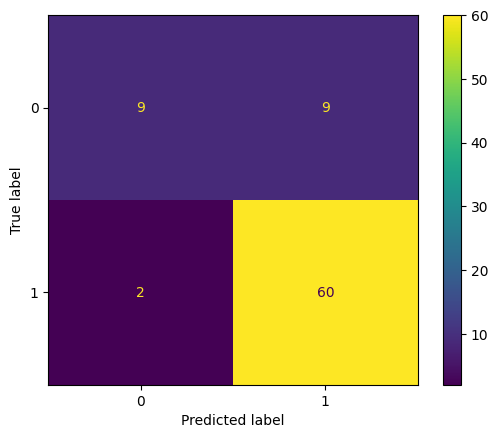

In [263]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred,y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=gb.classes_)
disp.plot()

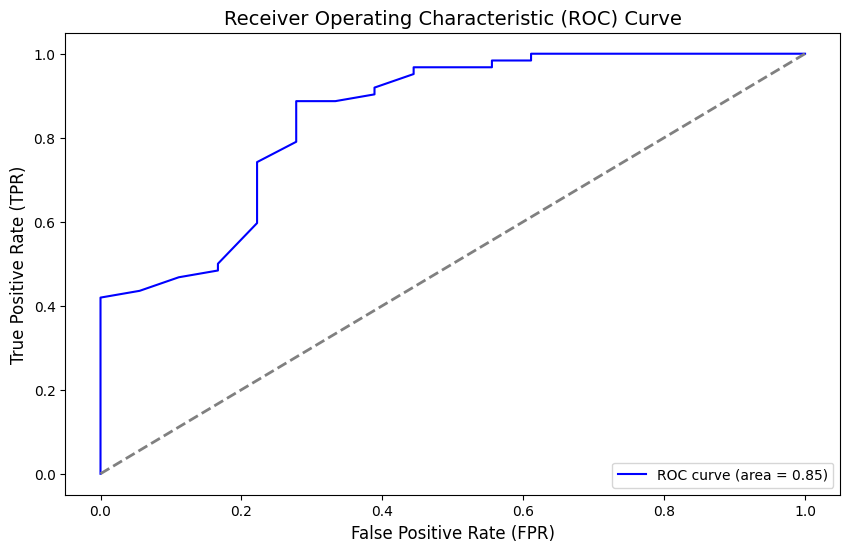

In [264]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## ADABOOST CLASSIFIER

In [265]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(algorithm =  'SAMME', learning_rate= 0.1, n_estimators =  200)
abc.fit(x_train, y_train)
y_pred = abc.predict(x_test)

In [266]:
y_pred_auc = abc.predict_proba(x_test)

[[ 9  9]
 [ 1 61]]
F1_Score :  0.9242424242424242
Accuracy_Score :  0.875
precision_score :  0.9838709677419355
recall_score :  0.8714285714285714


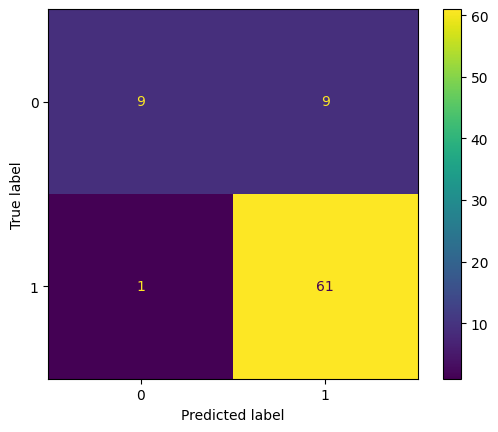

In [267]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
print('F1_Score : ',f1_score(y_pred, y_test))
print('Accuracy_Score : ',accuracy_score(y_pred, y_test))
print('precision_score : ',precision_score(y_pred, y_test))
print('recall_score : ',recall_score(y_pred, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=confusionmatrix, display_labels=gb.classes_)
disp.plot()

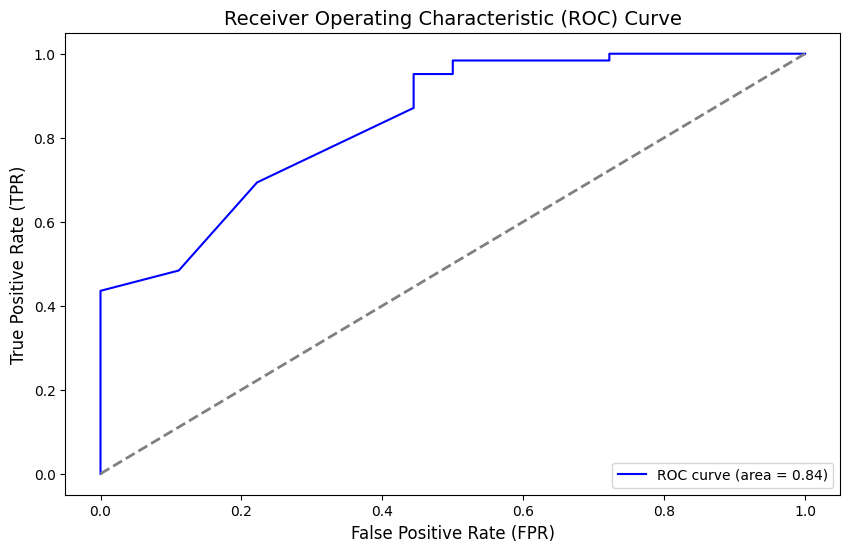

In [268]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.show()

In [269]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((80, 15), (80,), (316, 15), (316,))

## Hyper parameter tuning for 
- logistic regression
- svm
- decision tree
- xg boost
- ada boost
- random forest
- Naive bayes
- knn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names

Logistic regression Hyperparameter tuning

In [ ]:
params = {
    'C' : [0.1,0.01,0.001],
    'max_iter' : [100,200,300,500]
  }
clf = GridSearchCV(lr, params, cv = 10, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

SVM hyper parameter tuning

In [ ]:
params = {
    'C' : [0.1,0.01,0.001],
    'max_iter' : [5,20,50],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape':['ovo', 'ovr']
  }
clf = GridSearchCV(vectormachine, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Decision tree hyper parameter tuning

In [ ]:

params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter' :['best', 'random'],
    'max_depth' : [2,5,8],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,2]
  }
clf = GridSearchCV(dtc, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Gradient boosting algorithm

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['log_loss', 'exponential']
}
clf = GridSearchCV(gb, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

Ada boost hyperparameter tuning

In [ ]:
params = {
     'n_estimators': [50, 100, 200],  
    'learning_rate': [0.1, 0.01, 0.001], 
    'algorithm': ['SAMME', 'SAMME.R']  
}
clf = GridSearchCV(abc, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

random forest hyperparameter tuning

In [ ]:
params = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']  
}
clf = GridSearchCV(rfc, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

naivebayes doesn't have any  hyper parameter tuning 

hyper parameter tuning for knn

In [ ]:
params = {
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]  
}
clf = GridSearchCV(neigh, params, cv = 5, scoring='roc_auc', error_score='raise')
clf.fit(x_train, y_train)
print(clf.best_params_)
print(clf.best_score_)